# Algorithmic Methods for Data Mining
### Homework 2 - How do Taxis move in NYC?
##### Group #25 - Guilherme Vescovi Nicchio, Amirhossein Rajabi Shizari, Mario Raimo
07/11/2018

For this work was used the Yellow cabs data which can be found in the TLC website.
The data consists in almost 53 millions of trips (52,776,989 to be precise) performed by the yellow cabs in New York in the first 6 months of 2018.

It is possible to do many analysis with this data set, the ones performed in this work aimed to expose different trends among 24 hours or between months of New York City and its Boroughs.

The analysis can be useful for many purposes, as for example:
- Taxi Drivers planning their operations;
- Clients looking to plan their taxi trip;
- Taxi companies looking for optimize its operation;
- Acquire information about rush hours and traffic jams.

In this work was used the following libraries. 

In [1]:
#initialization, loading library and create empty data_frame
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import folium
import json
import branca.colormap as cm
import os
from branca.colormap import linear

#Auxiliar dataframes
borough_names = ['Manhattan','Brooklyn','Queens','Bronx','Staten Island','EWR']
daytrip_averages = pd.DataFrame(columns = borough_names)
data_zone = pd.read_csv("taxi _zone_lookup.csv", usecols = ['LocationID', 'Borough'])

Pandas are useful to dealing with data frames, matplotlib for plotting results, scipy for statistics analysis, folium to print choropleth map, branca.colormap for different colors on plottin and os to handle directories.

### Initial Considerations
1. For the analysis was filtered trips which have recorded trip distance equal to 0, total amount of payment equal to zero as it can be considered an error in the data acquisition. As it is desired to visualize and analyze the data through Boroughs was also filtered the trips with location Unknown.

2. When visualizing through Boroughs was considered where the trip started, as it is more useful for a taxi drive to know for example which hours and location it is possible get more passengers and also to passengers know when are the rush hours for taxi demands in each Borough. Hence, the visualization of pick-ups data is more meaningful.

3. In New York City, there are two types of taxis: yellow and green; they are widely recognizable symbols of the city. Taxis painted canary yellow (medallion taxis) are able to pick up passengers anywhere in the five boroughs. Those painted apple green (street hail livery vehicles, commonly known as "boro taxis"), which began to appear in August 2013, are allowed to pick up passengers in Upper Manhattan, the Bronx, Brooklyn, Queens (excluding LaGuardia Airport and John F. Kennedy International Airport), and Staten Island. 
Due to this the amount of rides of the yellow cabs in Manhattan are considerably higher as this taxis operate mainly in this area.

4. The biggest challenge in this work was to handle the big amount of data without overloading the computer. To solve this issue, on every task, the code is runned in a for loop through the months, do the analysis for a single month, store the results in a empty set and then load the next month repeating the process and combining the results. Afterwards, when changing to the next task, instead of creating new variables to handle the new analysis, was aimed to perform each task overwriting the variables of the previous exercise. This strategy has proven successful as the computer wasn't overloaded.

### RQ1 - In what period of the year Taxis are used more?
Create a plot that, for each month, shows the average number of trips recorded each day. Due to the differences among New York zones, we want to visualize the same information for each boroughs. Do you notice any difference among them? Provide comments and plausible explanations about what you observe (e.g.: what is the month with the highest daily average?).

The following code counts the amount of trips for each borough and stores it into a data frame.

In [25]:
for month in ['01', '02', '03', '04', '05', '06']:

    # ------------------------------------------STARTED LOADING AND HANDLING DATA
    #read file
    data_final = pd.read_csv("yellow_tripdata_2018-"+month+".csv", usecols=[
                             'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance', 'PULocationID', 'total_amount'])

    #merge file with zone look-up to have the proper name of the Borough
    data_final = pd.merge(data_final, data_zone, how="left",
                          left_on='PULocationID', right_on="LocationID")
    #eliminating unuseful data
    data_final = data_final[data_final.trip_distance != 0]
    data_final = data_final[data_final.total_amount != 0]
    data_final = data_final[data_final.Borough != 'Unknown']
    
    # Transformation of date columns from string to format datetime
    data_final['tpep_pickup_datetime'] = pd.to_datetime(
        data_final['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
    data_final['tpep_dropoff_datetime'] = pd.to_datetime(
        data_final['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

    # travel_time = data_final['tpep_dropoff_datetime'] - data_final['tpep_pickup_datetime']
    # inserting a new column with travel time in the dataframe
    data_final.insert(loc=2, column='travel_time', value=data_final['tpep_dropoff_datetime'] -
                      data_final['tpep_pickup_datetime'])

# ---------------------------------------FINISHED HANDLING ORIGINAL DATA FRAME
    #CALCULATIONS
    list_averages = []
    for i in borough_names:
        # get just the data from the main data frame 
        #that corresponds to the borough in i (from borough names)
        borough_data = data_final.loc[(data_final['Borough'] == i)]
        # get just the day in the date_time
        day = borough_data['tpep_pickup_datetime'].dt.day
        #divide the sum of all the trups by the lenght off the month
        average = sum(day.value_counts())/len(day.value_counts())
        list_averages.append(int(average))
    
    #insert the results in an empty table, each row a new month
    month = int(month)
    daytrip_averages.loc[month] = list_averages

#### The table below shows the average number of trips recorded per day for each of the 6 months

In [187]:
daytrip_averages

,Manhattan,Brooklyn,Queens,Bronx,Staten Island,EWR
1,255969,3176,16614,215,3,6
2,257955,3219,16315,211,3,5
3,275346,3898,17777,311,3,6
4,270892,3775,18815,329,3,6
5,268320,3893,19271,331,3,7
6,253123,3900,18061,320,4,6


Plotting the sum of the results to visualyze the city of New York.

[Text(0,0,'Jan'),
 Text(0,0,'Feb'),
 Text(0,0,'Mar'),
 Text(0,0,'Apr'),
 Text(0,0,'May'),
 Text(0,0,'Jun')]

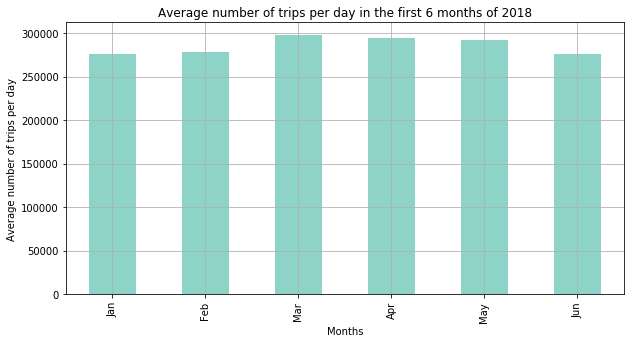

In [251]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
# sum all the columns to get the result of NY
new_york_daytrip_averages = daytrip_averages.iloc[:, :].sum(axis=1)
# plot
ax = new_york_daytrip_averages.plot(kind='bar', grid = True, colormap='Set3',  
                               figsize=(10, 5), title = 'Average number of trips per day in the first 6 months of 2018')

ax.set_xlabel('Months')
ax.set_ylabel('Average number of trips per day')
ax.xaxis.set_ticklabels(months)

#### Comments
It is possible to notice that there isn't much variation in the average between the months, although the first two are a bit lower. One possible explanation for the low trips in January and February might be the average snowfall inches, which is higher in this first months of the year compared to the rest of the months. On this months snow usually reaches 18 cm in January and 12 cm in February (Source Wikipedia), which could lead people to not leave home, hence less taxi rides.

### Follows the visualization per Borough

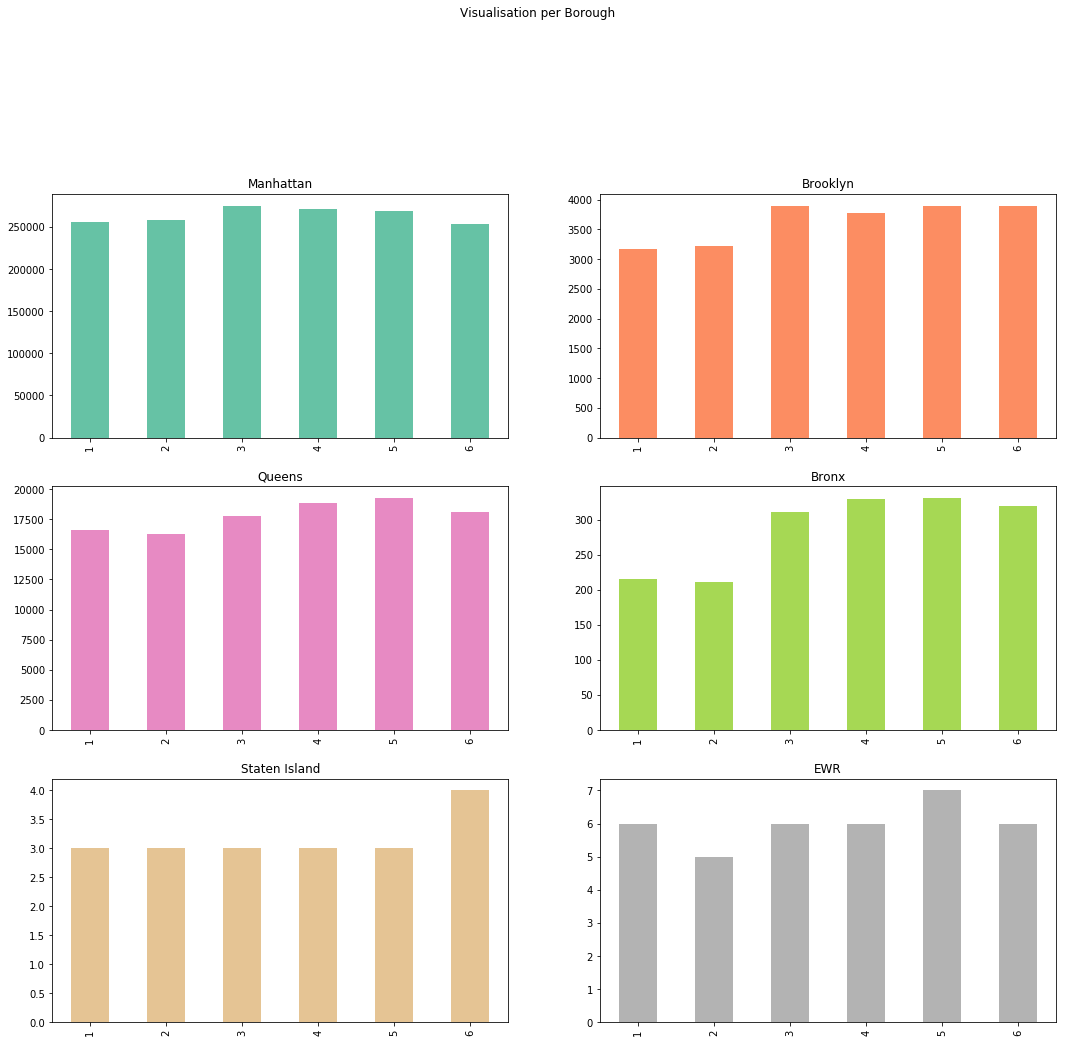

In [29]:
ax = daytrip_averages.plot( kind = 'bar', subplots= True, sharex = False, 
                           layout = (5,2), figsize = (18,26), colormap='Set2', 
                           legend = False, title = 'Visualisation per Borough')

As commented before, the yellow taxis operate mainly in Manhattan, thus we have significantly less pick-ups in the other boroughs, specially EWR and Staten Island which are on the limits of the city.

### RQ2 What are the time slots with more passengers? 
Set your own time slots and discover which are those when Taxis drive the highest number of passengers overall New York and repeat the analysis for each borough. Provide the results through a visualization and comment them.

To visualize the slots with more passengers, it was performed a count of trips initiated in each hour of the day and separated it for each borough.

In [30]:
for month in ['01', '02', '03', '04', '05', '06']:

    # ------------------------------------------STARTED LOADING AND HANDLING DATA
    data_final = pd.read_csv("yellow_tripdata_2018-"+month+".csv",
                             usecols=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance', 'PULocationID', 'payment_type', 'passenger_count', 'total_amount'])

    data_final = pd.merge(data_final, data_zone, how="left",
                          left_on='PULocationID', right_on="LocationID")
    data_final = data_final[data_final.trip_distance != 0]
    data_final = data_final[data_final.total_amount != 0]
    data_final = data_final[data_final.Borough != 'Unknown']

    # Transformation from string to format datetime
    data_final['tpep_pickup_datetime'] = pd.to_datetime(
        data_final['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
    data_final['tpep_dropoff_datetime'] = pd.to_datetime(
        data_final['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

    # inserting a new column with travel time in the dataframe
    data_final.insert(loc=2, column='travel_time', value=data_final['tpep_dropoff_datetime'] -
                      data_final['tpep_pickup_datetime'])

    # creating a column hours
    data_final.loc[:, 'hours'] = data_final['tpep_pickup_datetime'].dt.hour

# ---------------------------------------FINISHED HANDLING ORIGINAL DATA FRAME
# ---------------------------------------CALCULATIONS

    # summing passengers for borough and hours like excel pivot table
    hours_passengers = data_final.groupby(['Borough', 'hours'])[
        'passenger_count'].agg('sum')
    # unstacking the pivot table
    hours_passengers = hours_passengers.unstack().fillna(0)
    # transposing for a better plot
    hours_passengers = hours_passengers.transpose()
    # add the dataframe values of the current loop to the previous dataframe values
    if int(month) == 1:
        hours_passengers_total = hours_passengers
    else:
        hours_passengers_total = hours_passengers_total.add(hours_passengers)

### Final Table for analysis
In the table bellow is possible to observe the sum of all passengers for each hour and for each Borough.

In [81]:
hours_passengers_total

Borough,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island
hours,,,,,,
0,2826.0,71557.0,3.0,2417738.0,185682.0,39.0
1,2366.0,51232.0,6.0,1698041.0,89338.0,35.0
2,2010.0,38801.0,8.0,1230722.0,43307.0,28.0
3,1815.0,30954.0,8.0,897409.0,30434.0,42.0
4,2170.0,27006.0,35.0,681714.0,42847.0,56.0
5,2671.0,17415.0,53.0,700469.0,76667.0,48.0
6,4141.0,34374.0,79.0,1654677.0,128190.0,13.0
7,6390.0,49595.0,57.0,2868548.0,180222.0,19.0
8,5831.0,57832.0,47.0,3614284.0,193620.0,32.0


In [82]:
#sum all the columns to get the result of NY
hours_passengers_ny = hours_passengers_total.iloc[:,:].sum(axis=1)

Text(0,0.5,'Number of trips')

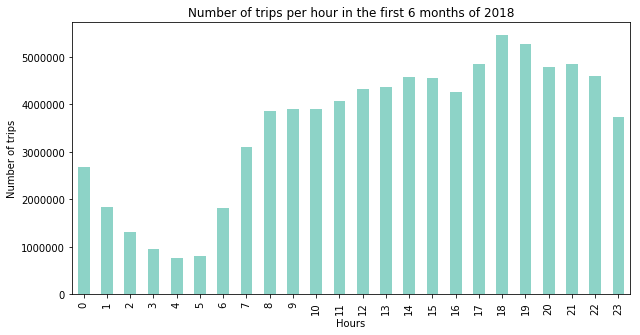

In [83]:
#PLOT
ax = hours_passengers_ny.plot( kind = 'bar', colormap='Set3', figsize = (10,5), title = 'Number of trips per hour in the first 6 months of 2018')

ax.set_xlabel('Hours')
ax.set_ylabel('Number of trips')

Observing the plot is possible to notice the trend among the hours, for example the low number of trips decreases at night reaching its lowest at 4 am, the peak of activity at 18 o'clock which is the rush hour when people are finishing the labour day and initiating the night shift. 

### Visualization per Borough

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014EEBD9A748>,
      dtype=object)

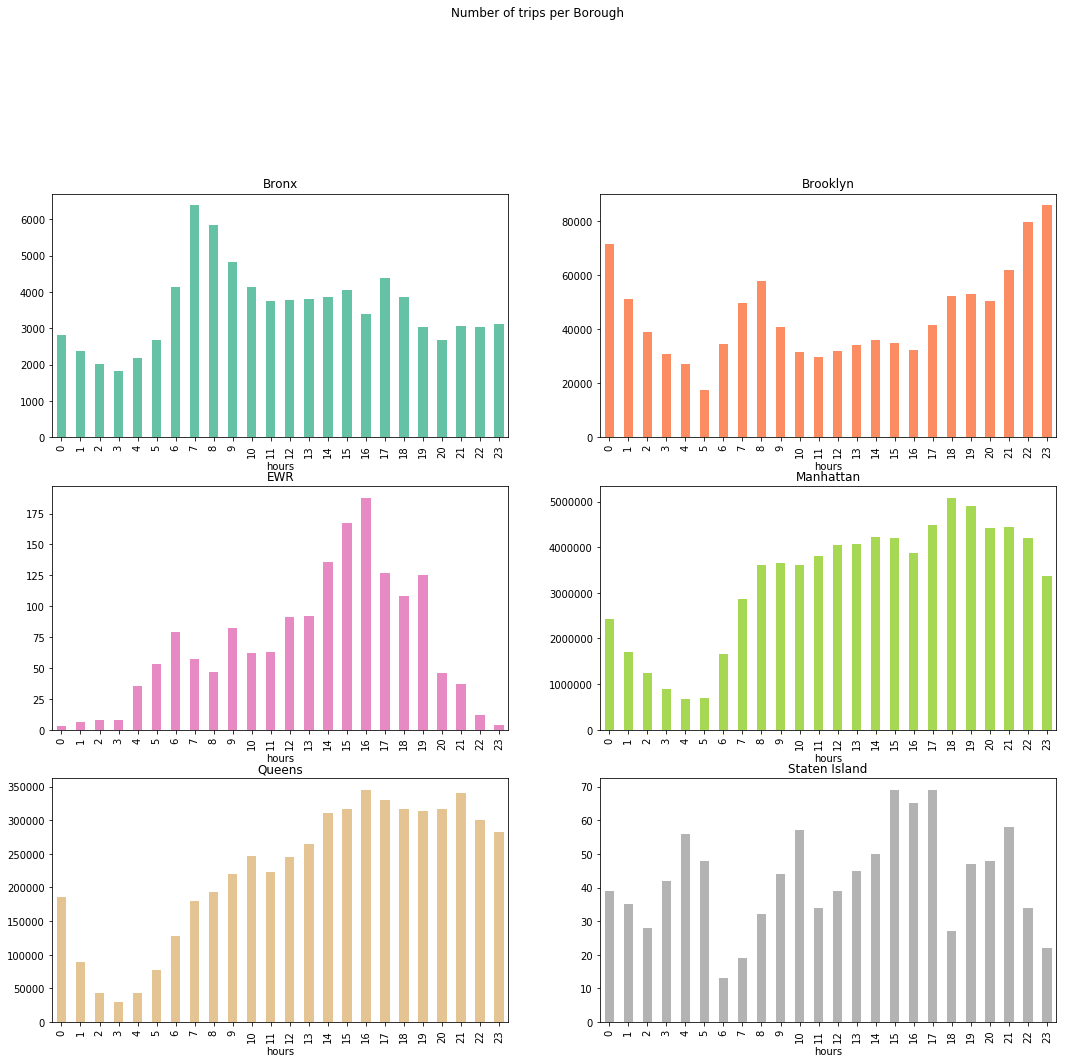

In [31]:
hours_passengers_total.plot( kind = 'bar', subplots= True, sharex = False,
                            title = 'Number of trips per Borough',
                            colormap = 'Set2', layout = (5,2), figsize = (18,26), legend = False)

Observing the plot per Borough is possible to notice how each Borough have different characteristics. For example, Brooklyn has more passengers at night, Brooklyn is famous by its pubs, thus the night life in this borough increases the demand for cabs in this period, while at EWR its noticed a considerable smaller activity during the night, which could be due to a mainly residencial or industrial zone.

### RQ3 Do the all trips last the same?
Let's put our attention on the distribution of trip's duration. Provide a plot for it and comment what you see. Run this analysis for NYC and for each borough (and obviously comment the results!).

It is obvious that the trips do not last the same, but to have an overview on how the trips tend to last longer in different times of the day, it was performed an average of trip duration for each slot of hour. This can provide a more meaningful image of how the trips duration varies over the day and expose traffic jam periods.

In [2]:
for month in ['01', '02', '03', '04', '05', '06']:
    # load tpep_pickup_datetime,	tpep_dropoff_datetime, trip_distance, PULocationID, payment_type passenger_count
    data_final = pd.read_csv("yellow_tripdata_2018-"+month+".csv", usecols=[
                             'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance', 'PULocationID', 'total_amount'])

    data_final = pd.merge(data_final, data_zone, how="left",
                          left_on='PULocationID', right_on="LocationID")
    data_final = data_final[data_final.trip_distance != 0]
    data_final = data_final[data_final.total_amount != 0]
    data_final = data_final[data_final.Borough != 'Unknown']

    # Transformation from string to format datetime
    data_final['tpep_pickup_datetime'] = pd.to_datetime(
        data_final['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
    data_final['tpep_dropoff_datetime'] = pd.to_datetime(
        data_final['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

    # inserting a new column with travel time in the dataframe
    data_final.insert(loc=2, column='travel_time', value=data_final['tpep_dropoff_datetime'] -
                      data_final['tpep_pickup_datetime'])
    # eliminating travel time small than 0
    data_final = data_final[data_final.travel_time.dt.days.astype(
        'float64') >= 0]

    # creating a column hours
    data_final.loc[:, 'hours'] = data_final['tpep_pickup_datetime'].dt.hour

    # summing travel time for borough and hours like excel pivot table
    travel_time_hours = data_final.groupby(['Borough', 'hours'])[
        'travel_time'].sum()
    # counting how many trips to make a mean time per hour
    travel_time_count = data_final.groupby(['Borough', 'hours'])[
        'travel_time'].count()

    # unstacking the pivot table
    travel_time_hours = travel_time_hours.unstack().fillna(0)
    travel_time_count = travel_time_count.unstack().fillna(0)
    # transposing for a better plot
    travel_time_hours = travel_time_hours.transpose()
    travel_time_count = travel_time_count.transpose()
    # add the dataframe values of the current loop to the previous dataframe values
    # data with all the sums and all the count for each month
    if int(month) == 1:
        travel_time_hours_total = travel_time_hours
        travel_time_count_total = travel_time_count
    else:
        travel_time_hours_total = travel_time_hours_total.add(
            travel_time_hours)
        travel_time_count_total = travel_time_count_total.add(
            travel_time_count)

# summing all the columns to calculate the average of all NY
ny_total_hours = travel_time_hours_total.iloc[:, :].sum(axis=1)
ny_total_count = travel_time_count_total.iloc[:, :].sum(axis=1)
# dividing all count to all travel times to see the average for all NY
ny_total_hours = ny_total_hours.divide(ny_total_count)

# dividing all travel time by number of trips, so it is the average
travel_time_hours_total = travel_time_hours_total.divide(
    travel_time_count_total)
#travel_time_hours_total['Queens'][7] = travel_time_hours_total['Queens'][6]

### Final Table for analysis
In the table bellow is possible to observe the average duration of the trip for each hour of the day and for each Borough.

In [68]:
travel_time_hours_total

Borough,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island
hours,,,,,,
0,00:13:44.772402,00:15:13.912529,00:00:10.500000,00:15:01.936646,00:24:51.450026,00:21:34.423076
1,00:16:30.073329,00:15:54.587696,00:11:24.500000,00:14:54.115603,00:23:32.035877,00:19:04.173913
2,00:12:57.586391,00:15:35.851226,00:06:06,00:14:49.204359,00:20:14.379738,00:08:07.190476
3,00:17:13.925612,00:14:57.609171,00:00:45.125000,00:15:15.252126,00:18:00.333614,01:02:44.642857
4,00:16:09.485855,00:16:24.232908,00:00:50.535714,00:15:53.299283,00:20:13.883166,00:09:02.205882
5,00:17:24.167058,00:16:42.636710,00:04:45.923076,00:14:04.137250,00:30:03.784138,00:07:54.511627
6,00:25:13.275446,00:19:43.476419,00:04:39.716666,00:13:27.416353,00:37:45.080060,00:10:30.454545
7,00:31:23.830611,00:21:43.353564,00:12:12.311111,00:14:12.038447,00:42:37.542839,00:39:54.769230
8,00:24:35.577181,00:21:34.964896,00:06:35.837837,00:15:04.061094,00:41:58.692693,00:25:11.900000


In the plot the time data was converted to a float number and due to this to have an idea about the average time on each trip consider that 1 on the vertical axis is approximately 16 minutes.

Text(0,0.5,'Average trip duration x 16 minutes')

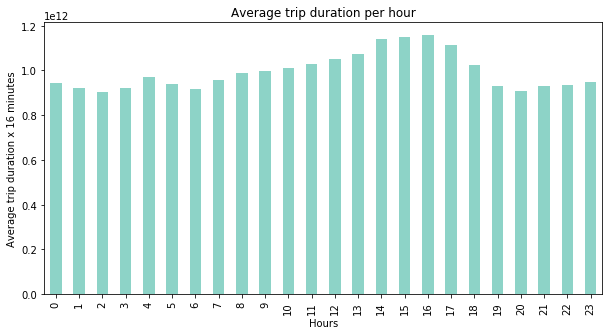

In [3]:
ax = ny_total_hours.plot( kind = 'bar', colormap='Set3', figsize = (10,5), 
                    title = 'Average trip duration per hour')
#setting axis labels
ax.set_xlabel('Hours')
ax.set_ylabel('Average trip duration x 16 minutes')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014EFBE08240>,
      dtype=object)

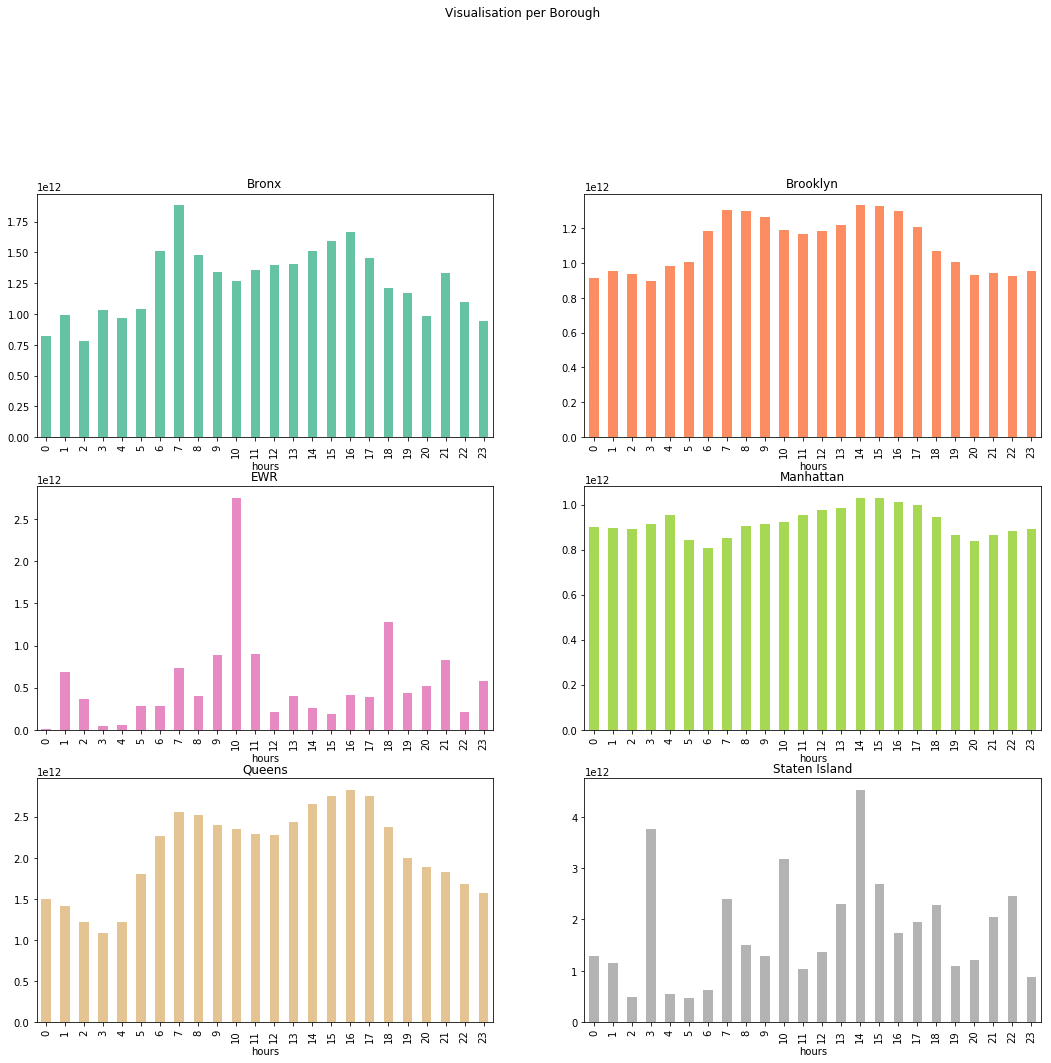

In [24]:
travel_time_hours_total.plot( kind = 'bar', subplots= True, colormap = 'Set2', 
                       layout = (5,2), figsize = (18,26), legend = False, sharey = False, 
                             sharex = False, title = 'Visualisation per Borough' )

In the plot the time data was converted to a float number and due to this to have an idea about the average time on each trip consider that 1 is approximately 16 minutes in the vertical axis. It is possible to visualize that the trips starting in Staten island tend to last longer, this is understandable as this borough is in the limits of New York city. It is also possible to notice that the in the rush hours (8 and 18) the the trips tend to last longer, which is explained with the traffic jam in those periods. Some Boroughs like Brooklyn and Manhattan have usually faster trips, which could mean that people there don't usually go to another Boroughs, so if a Taxi driver wants to make short trips in the same Borough should consider this two places.

In in the Boroughs EWR and Staten Island is possible to visualyze some peaks in unusual hours, this is explained with the fact that there was not many trips registered in those boroughs, hence a single trip with long duration can increase the average of the time slot in the respectives boroughs.

### RQ4 What is the most common way of payments? 
Discover the way payments are executed in each borough and visualize the number of payments for any possible means. Then run the Chi-squared test to see whether the method of payment is correlated to the borough. Then, comment the results.

In [5]:
# scipy.stats.chisquare
for month in ['01', '02', '03', '04', '05', '06']:
    # load tpep_pickup_datetime,	tpep_dropoff_datetime, trip_distance, PULocationID, payment_type passenger_count
    data_final = pd.read_csv("yellow_tripdata_2018-"+month+".csv", usecols=[
                             'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'payment_type', 'trip_distance', 'PULocationID', 'total_amount'])

    data_final = pd.merge(data_final, data_zone, how="left",
                          left_on='PULocationID', right_on="LocationID")
    data_final = data_final[data_final.trip_distance != 0]
    data_final = data_final[data_final.total_amount != 0]
    data_final = data_final[data_final.Borough != 'Unknown']
    #count by borough
    common_payments = data_final.groupby(['Borough'])[
        'payment_type'].value_counts().to_frame()
    common_payments = common_payments.unstack()
    
    if int(month) == 1:
        common_payments_total = common_payments
    else:
        common_payments_total = common_payments_total.add(common_payments)

In [6]:
#transpose matrix and fill NaN with 0 in order to plot.
common_payments_total = common_payments_total.transpose().fillna(0)

In [7]:
common_payments_total

Borough                      Bronx  Brooklyn    EWR   Manhattan     Queens  \
             payment_type                                                    
payment_type 1             26789.0  437355.0  863.0  34117526.0  2286202.0   
             2             24214.0  226181.0  199.0  14395400.0   960828.0   
             3               805.0    6201.0   93.0    200444.0    25831.0   
             4               222.0    1628.0   15.0     58489.0     7077.0   

Borough                    Staten Island  
             payment_type                 
payment_type 1                     321.0  
             2                     279.0  
             3                      27.0  
             4                       0.0

[Text(0,0,'Credit Card'),
 Text(0,0,'Cash'),
 Text(0,0,'No Charge'),
 Text(0,0,'Dispute')]

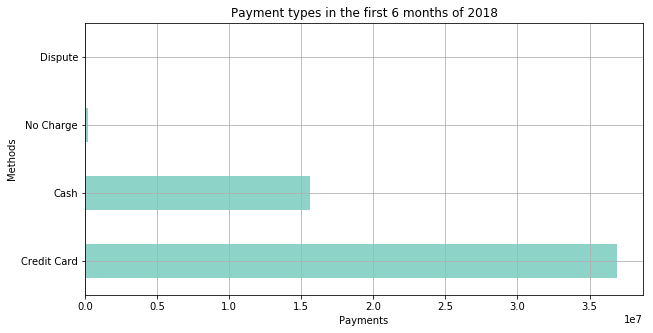

In [8]:
#plotting for all NY
payment_type_ny = common_payments_total.iloc[:,:].sum(axis=1)

ax = payment_type_ny.plot( kind = 'barh', colormap='Set3',grid = True, figsize = (10,5), title = 'Payment types in the first 6 months of 2018')

ax.set_xlabel('Payments')
ax.set_ylabel('Methods')
ax.yaxis.set_ticklabels(['Credit Card', 'Cash', 'No Charge', 'Dispute'])

In [10]:
payment_type_ny.sum()

52776989.0

Credit Card is the most used payment method for taxis in NY, so it is better for the taxi drivers to be able to accept this payment method in order to get more passengers.

In [53]:
payment_matrix = common_payments_total.as_matrix() #transform it to arrays

C:\Users\guilh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [59]:
scipy.stats.chi2_contingency(payment_matrix)

(33897.96093393685,
 0.0,
 15,
 array([[3.63472229e+04, 4.69003523e+05, 8.17340973e+02, 3.40711442e+07,
         2.29130574e+06, 4.38010931e+02],
        [1.53862030e+04, 1.98534656e+05, 3.45989957e+02, 1.44227123e+07,
         9.69936418e+05, 1.85415131e+02],
        [2.30097515e+02, 2.96904513e+03, 5.17420897e+00, 2.15688710e+05,
         1.45052005e+04, 2.77284532e+00],
        [6.64766027e+01, 8.57775598e+02, 1.49486114e+00, 6.23138092e+04,
         4.19064262e+03, 8.01092253e-01]]))

The p-value for the observed data is 0. This shows that there is no relation with the payment method and the Borough.

###### Details on the function

scipy.stats.chi2_contingency(observed, correction=True, lambda_=None)
Chi-square test of independence of variables in a contingency table.

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table observed. The expected frequencies are computed based on the marginal sums under the assumption of independence; see scipy.stats.contingency.expected_freq. 
An often quoted guideline for the validity of this calculation is that the test should be used only if the observed and expected frequency in each cell is at least 5.

This is a test for the independence of different categories of payment per Borough. The test is only meaningful when the dimension of observed is two or more. Applying the test to a one-dimensional table will always result in expected equal to observed and a chi-square statistic equal to 0.

Like stats.chisquare, this function computes a chi-square statistic; the convenience this function provides is to figure out the expected frequencies and degrees of freedom from the given contingency table.

### CRQ2: Visualize Taxis movements! 

NYC is divided in many Taxis zones. For each yellow cab trip we know the zone the Taxi pick up and drop off the users. Let's visualize, on a chropleth map, the number of trips that starts in each zone. Than, do another map to count the races that end up in the single zone. Comment your discoveries. To perform this task we use the library folium. You find some examples of chorophlet maps here and here. The Geojson we use to trace the zones is taxi_zones.json in the Homework's repository.

In the following analysis was counted how many pick-ups and how many drop-offs there was on each zone of New York, and to provide an overview of the hotspots it was created an Choropleth map.

In [11]:
#loading json file
ny_zones = json.load(open('taxi_zones.json'))

In [12]:
#create a empty data frame with all possible zones (266)

pick_up_frame= pd.DataFrame(index=list(range(1,266)), columns=['count'])
drop_off_frame = pd.DataFrame(index=list(range(1,266)), columns=['count'])

#loop through the files for respective months
for month in ['01', '02', '03', '04', '05', '06']:
    
    #read csv file
    data_final = pd.read_csv("yellow_tripdata_2018-"+ month +
                             ".csv", usecols=['PULocationID', 'DOLocationID'])

    #count how many trips per location/zone
    pick_up_series = data_final.groupby(['PULocationID'])['PULocationID'].count()
    drop_off_series = data_final.groupby(['DOLocationID'])['DOLocationID'].count()
    
    #There are some months that weren't trips in some Zobes,
    #the index then will have a value related to another zone.
    #To avoid this, perform the following loop 
    #If there is the value, assign the value, else assign 0
    for i in range(1,266):
        if i in pick_up_series:
            pick_up_frame['count'][i] = pick_up_series[i]
        else:
            pick_up_frame['count'][i] = 0
    
    for i in range(1,266):
        if i in drop_off_series:
            drop_off_frame['count'][i] = drop_off_series[i]
        else:
            drop_off_frame['count'][i] = 0
        
    #for each loop save the results adding to the previous one
    if int(month) == 1:
        pick_up_series_total = pick_up_frame
        drop_off_series_total = drop_off_frame
    else:
        pick_up_series_total = pick_up_series_total.add(pick_up_frame)
        drop_off_series_total = drop_off_series_total.add(drop_off_frame)
        
#getting just the column count to use in the map generation
drop_off_series_total = drop_off_series_total['count']
pick_up_series_total = pick_up_series_total['count']

In [14]:
#creating map for the pick up locations with folium
map_pu = folium.Map(location=[40.7017815, -74.058986], tiles='cartodbpositron', zoom_start=10)

#adding the choropleth map using the json file to set the zones perimeter
#and using the pick_up_series_total as data
map_pu.choropleth(
    geo_data = ny_zones,
    name ='choropleth',
    data = pick_up_series_total,
    key_on = 'feature.properties.LocationID',
    fill_color = 'YlGn',
    fill_opacity = 0.8,
    line_opacity = 0.2,
    legend_name = 'Pick-up map'
    highlight=True
)

folium.LayerControl().add_to(map_pu)
map_pu.save(os.path.join('results', r"C:\Users\guilh\Desktop\ADM\HW2\pick_up_map.html"))

Open the files map_pu.html file in the repository to visualize the map of pick-ups concentrations.

In [15]:
map_do = folium.Map(location=[40.7017815, -74.058986], tiles='cartodbpositron', zoom_start=10)

map_do.choropleth(
    geo_data= ny_zones,
    name='choropleth',
    data= drop_off_series_total,
    key_on='feature.properties.LocationID',
    fill_color='Oranges',
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='Drop-off map'
    highlight=True
)

folium.LayerControl().add_to(map_do)
map_do.save(os.path.join('results', r"C:\Users\guilh\Desktop\ADM\HW2\drop_off_map.html"))

Open the files map_do.html file in the repository to visualize the map of drop-offs concentrations.

It is possible to visualize that most trips happen inside Manhattan due to the normal zone of operations of the yellow taxis. The only two other zones that has high concentration of trios outside this areas are the zones of the airports located in New York city, La Guardia airport and JFK airport.

Despite La Guardia being an Airport smaller than JFK, it has a higher concentration of trips. This is explained due to the fact that La Guardia has less options to reach it using public transport means, thus the passengers of it tend to use taxis.